# SkyPatrol event summary
Quick look notebook to summarize and triage `output/skypatrol_events.csv`.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)

CSV_PATH = '/home/calder/code/malca/output/skypatrol_events.csv'

df = pd.read_csv(CSV_PATH)
df


,path,dip_significant,jump_significant,n_points,jd_first,jd_last,cadence_median_days,dip_best_morph,dip_best_delta_bic,dip_best_width_param,jump_best_morph,jump_best_delta_bic,jump_best_width_param,dip_count,jump_count,dip_run_count,jump_run_count,dip_max_run_points,jump_max_run_points,dip_max_run_duration,jump_max_run_duration,dip_max_run_sum,jump_max_run_sum,dip_max_run_max,jump_max_run_max,dip_max_log_bf_local,jump_max_log_bf_local,dip_bayes_factor,jump_bayes_factor,dip_best_p,jump_best_p,dip_best_mag_event,jump_best_mag_event,dip_trigger_max,jump_trigger_max,dip_max_event_prob,jump_max_event_prob,used_sigma_eff,baseline_source,trigger_mode,dip_trigger_threshold,jump_trigger_threshold,dip_run_sum_threshold,jump_run_sum_threshold
0,input/skypatrol2/25770019815-light-curves.csv,True,False,1562,2.457008e+06,2.460842e+06,1.015614,gaussian,682.672560,2.336512,none,0.000000,0.000000,8,0,1,0,8,0,5.986897,NaN,459.360197,NaN,94.777281,NaN,94.777281,7.004979,421.829039,-1.422757,0.994761,0.000574,14.172240,13.193863,94.777281,7.004979,1.0,0.276107,True,gp_sho,logbf,5.0,5.0,12.5,12.5
1,input/skypatrol2/231929175915-light-curves.csv,True,False,1377,2.457042e+06,2.460840e+06,1.322026,noise,0.000000,NaN,none,0.000000,0.000000,33,0,2,0,28,0,39.965573,NaN,1256.751767,NaN,84.384337,NaN,104.358519,9.884611,1546.717726,148.236669,0.973767,0.148201,14.881250,14.444304,104.358519,9.884611,1.0,0.999697,True,gp_sho,logbf,5.0,5.0,12.5,12.5
2,input/skypatrol2/223339338105-light-curves.csv,True,True,1752,2.456221e+06,2.460842e+06,1.038721,gaussian,79.072935,9.531620,paczynski,66.646686,0.491703,48,3,6,1,16,3,10.993642,2.991670,218.253900,55.710810,84.183875,44.015546,84.183875,57.107726,755.011871,183.706275,0.963187,0.013208,13.571832,13.256771,84.183875,57.107726,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
3,input/skypatrol2/120259184943-light-curves.csv,True,False,1969,2.457008e+06,2.460843e+06,0.981231,noise,0.000000,NaN,none,0.000000,0.000000,40,0,2,0,35,0,40.898394,NaN,3089.791467,NaN,214.707443,NaN,416.051074,34.408655,2940.505670,34.259808,0.983382,0.010490,13.449228,13.098159,416.051074,34.408655,1.0,0.999909,True,gp_sho,logbf,5.0,5.0,12.5,12.5
4,input/skypatrol2/317827964025-light-curves.csv,True,False,1181,2.457078e+06,2.460608e+06,1.095992,noise,0.000000,NaN,none,0.000000,0.000000,18,0,2,0,10,0,13.958703,NaN,477.685305,NaN,87.957431,NaN,87.957431,307.831108,855.606968,298.413675,0.986792,0.000815,13.002843,11.529490,87.957431,307.831108,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
5,input/skypatrol2/266288137752-light-curves.csv,True,False,1824,2.457008e+06,2.460713e+06,1.007461,gaussian,3522.575083,8.060658,none,0.000000,0.000000,27,0,5,0,8,0,12.000620,NaN,343.311205,NaN,128.101782,NaN,128.101782,32.689333,1532.783375,503.966762,0.970618,0.237605,13.246863,13.047771,128.101782,32.689333,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
6,input/skypatrol2/326417831663-light-curves.csv,False,False,1817,2.457048e+06,2.460842e+06,0.995523,none,0.000000,0.000000,none,0.000000,0.000000,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,245.086937,139.510992,1481.059986,482.494737,0.994117,0.010490,13.827150,13.033269,245.086937,139.510992,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
7,input/skypatrol2/377957522430-light-curves.csv,True,False,1360,2.456593e+06,2.460693e+06,1.059106,gaussian,98.214615,5.836850,none,0.000000,0.000000,27,0,5,0,9,0,13.261470,NaN,402.754746,NaN,82.191741,NaN,82.191741,12.524462,650.644894,25.726982,0.963187,0.013208,13.767097,13.204938,82.191741,12.524462,1.0,0.999908,True,gp_sho,logbf,5.0,5.0,12.5,12.5
8,input/skypatrol2/352187470767-light-curves.csv,False,False,2659,2.457421e+06,2.460838e+06,0.832204,none,0.000000,0.000000,none,0.000000,0.000000,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,793.475169,21.495514,1390.565708,123.214362,0.999275,0.029382,12.477555,12.271211,793.475169,21.495514,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
9,input/skypatrol2/360777377116-light-curves.csv,True,False,2655,2.457008e+06,2.460836e

In [33]:
# Basic counts
total = len(df)
dip_sig = df['dip_significant'].sum()
jump_sig = df['jump_significant'].sum()
both_sig = ((df['dip_significant']) & (df['jump_significant'])).sum()
print(f'Total LCs: {total}')
print(f'Dip significant: {dip_sig}')
print(f'Jump significant: {jump_sig}')
print(f'Both significant: {both_sig}')
df[['dip_significant','jump_significant']].mean().to_frame('fraction')


Total LCs: 28
Dip significant: 26
Jump significant: 4
Both significant: 4


,fraction
dip_significant,0.928571
jump_significant,0.142857


In [34]:
# Dip candidates sorted by Bayes factor (all rows)
dip_sorted = df.sort_values('dip_bayes_factor', ascending=False)
dip_cols = ['path','dip_significant','dip_best_morph','dip_best_delta_bic','dip_best_width_param',
            'dip_bayes_factor','dip_max_log_bf_local','dip_trigger_max','dip_max_event_prob']
dip_cols = [c for c in dip_cols if c in dip_sorted.columns]
dip_sorted[dip_cols]


,path,dip_significant,dip_best_morph,dip_best_delta_bic,dip_best_width_param,dip_bayes_factor,dip_max_log_bf_local,dip_trigger_max,dip_max_event_prob
19,input/skypatrol2/532576686103-light-curves.csv,True,gaussian,2419.352856,11.218547,17605.462249,327.723686,327.723686,1.0
24,input/skypatrol2/644245387906-light-curves.csv,True,noise,0.000000,NaN,9640.236871,319.210236,319.210236,1.0
27,input/skypatrol2/68720274411-light-curves.csv,True,gaussian,3557.092008,3.776750,5744.645551,499.766822,499.766822,1.0
9,input/skypatrol2/360777377116-light-curves.csv,True,gaussian,1063.270831,1.925034,4368.705154,542.716181,542.716181,1.0
21,input/skypatrol2/515397118400-light-curves.csv,True,gaussian,1539.219444,2.831121,4229.463964,271.104184,271.104184,1.0
22,input/skypatrol2/601296043597-light-curves.csv,True,noise,0.000000,NaN,3898.273183,72.505079,72.505079,1.0
14,input/skypatrol2/455267102087-light-curves.csv,True,gaussian,973.627809,2.331300,3099.400719,423.271104,423.271104,1.0
3,input/skypatrol2/120259184943-light-curves.csv,True,noise,0.000000,NaN,2940.505670,416.051074,416.051074,1.0
10,input/skypatrol2/335007754417-light-curves.csv,True,noise,0.000000,NaN,2891.595910,85.838942,85.838942,1.0
18,input/skypatrol2/515396514761-light-curves.csv,True,noise,0.000000,NaN,2740.430893,147.152739,147.152739,1.0


In [35]:
# Jump candidates sorted by Bayes factor (all rows)
jump_sorted = df.sort_values('jump_bayes_factor', ascending=False)
jump_cols = ['path','jump_significant','jump_best_morph','jump_best_delta_bic','jump_best_width_param',
             'jump_bayes_factor','jump_max_log_bf_local','jump_trigger_max','jump_max_event_prob']
jump_cols = [c for c in jump_cols if c in jump_sorted.columns]
jump_sorted[jump_cols]


,path,jump_significant,jump_best_morph,jump_best_delta_bic,jump_best_width_param,jump_bayes_factor,jump_max_log_bf_local,jump_trigger_max,jump_max_event_prob
27,input/skypatrol2/68720274411-light-curves.csv,True,noise,0.000000,NaN,1828.445921,387.185090,387.185090,1.000000
5,input/skypatrol2/266288137752-light-curves.csv,False,none,0.000000,0.000000,503.966762,32.689333,32.689333,1.000000
12,input/skypatrol2/438086977939-light-curves.csv,False,none,0.000000,0.000000,495.521721,267.135001,267.135001,1.000000
6,input/skypatrol2/326417831663-light-curves.csv,False,none,0.000000,0.000000,482.494737,139.510992,139.510992,1.000000
25,input/skypatrol2/609886184506-light-curves.csv,True,noise,0.000000,NaN,335.867048,27.383078,27.383078,1.000000
4,input/skypatrol2/317827964025-light-curves.csv,False,none,0.000000,0.000000,298.413675,307.831108,307.831108,1.000000
15,input/skypatrol2/377958261591-light-curves.csv,False,none,0.000000,0.000000,243.634874,155.374237,155.374237,1.000000
2,input/skypatrol2/223339338105-light-curves.csv,True,paczynski,66.646686,0.491703,183.706275,57.107726,57.107726,1.000000
14,input/skypatrol2/455267102087-light-curves.csv,False,none,0.000000,0.000000,179.829657,22.042355,22.042355,1.000000
19,input/skypatrol2/532576686103-light-curves.csv,False,none,0.000000,0.000000,158.094226,12.110152,12.110152,0.999273


In [36]:
# Morphology distribution among significant dips
sig_dip = df[df['dip_significant']]
sig_jump = df[df['jump_significant']]
display(sig_dip['dip_best_morph'].value_counts())
display(sig_jump['jump_best_morph'].value_counts())


dip_best_morph
gaussian    18
noise        8
Name: count, dtype: int64

jump_best_morph
noise        3
paczynski    1
Name: count, dtype: int64

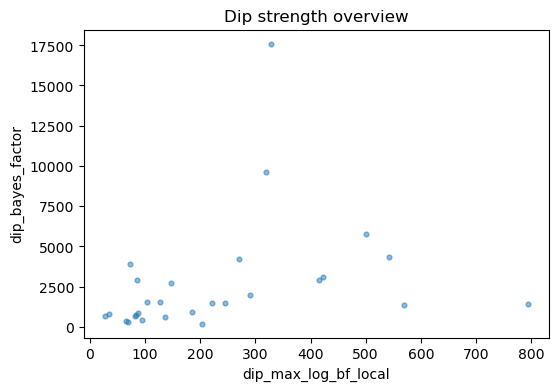

In [37]:
# Quick scatter: max log BF vs bayes_factor for dips
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df['dip_max_log_bf_local'], df['dip_bayes_factor'], s=12, alpha=0.5)
ax.set_xlabel('dip_max_log_bf_local')
ax.set_ylabel('dip_bayes_factor')
ax.set_title('Dip strength overview')
plt.show()


In [38]:
# Full table of significant events (dip or jump)
sig = df[(df['dip_significant']) | (df['jump_significant'])].copy()
prob_cols = [c for c in ['dip_max_event_prob','jump_max_event_prob'] if c in sig.columns]
display(sig[['path','dip_significant','jump_significant'] + prob_cols])
sig


,path,dip_significant,jump_significant,dip_max_event_prob,jump_max_event_prob
0,input/skypatrol2/25770019815-light-curves.csv,True,False,1.0,0.276107
1,input/skypatrol2/231929175915-light-curves.csv,True,False,1.0,0.999697
2,input/skypatrol2/223339338105-light-curves.csv,True,True,1.0,1.000000
3,input/skypatrol2/120259184943-light-curves.csv,True,False,1.0,0.999909
4,input/skypatrol2/317827964025-light-curves.csv,True,False,1.0,1.000000
5,input/skypatrol2/266288137752-light-curves.csv,True,False,1.0,1.000000
7,input/skypatrol2/377957522430-light-curves.csv,True,False,1.0,0.999908
9,input/skypatrol2/360777377116-light-curves.csv,True,False,1.0,1.000000
10,input/skypatrol2/335007754417-light-curves.csv,True,False,1.0,0.999945
11,input/skypatrol2/438086901547-light-curves.csv,True,False,1.0,0.981347


,path,dip_significant,jump_significant,n_points,jd_first,jd_last,cadence_median_days,dip_best_morph,dip_best_delta_bic,dip_best_width_param,jump_best_morph,jump_best_delta_bic,jump_best_width_param,dip_count,jump_count,dip_run_count,jump_run_count,dip_max_run_points,jump_max_run_points,dip_max_run_duration,jump_max_run_duration,dip_max_run_sum,jump_max_run_sum,dip_max_run_max,jump_max_run_max,dip_max_log_bf_local,jump_max_log_bf_local,dip_bayes_factor,jump_bayes_factor,dip_best_p,jump_best_p,dip_best_mag_event,jump_best_mag_event,dip_trigger_max,jump_trigger_max,dip_max_event_prob,jump_max_event_prob,used_sigma_eff,baseline_source,trigger_mode,dip_trigger_threshold,jump_trigger_threshold,dip_run_sum_threshold,jump_run_sum_threshold
0,input/skypatrol2/25770019815-light-curves.csv,True,False,1562,2.457008e+06,2.460842e+06,1.015614,gaussian,682.672560,2.336512,none,0.000000,0.000000,8,0,1,0,8,0,5.986897,NaN,459.360197,NaN,94.777281,NaN,94.777281,7.004979,421.829039,-1.422757,0.994761,0.000574,14.172240,13.193863,94.777281,7.004979,1.0,0.276107,True,gp_sho,logbf,5.0,5.0,12.5,12.5
1,input/skypatrol2/231929175915-light-curves.csv,True,False,1377,2.457042e+06,2.460840e+06,1.322026,noise,0.000000,NaN,none,0.000000,0.000000,33,0,2,0,28,0,39.965573,NaN,1256.751767,NaN,84.384337,NaN,104.358519,9.884611,1546.717726,148.236669,0.973767,0.148201,14.881250,14.444304,104.358519,9.884611,1.0,0.999697,True,gp_sho,logbf,5.0,5.0,12.5,12.5
2,input/skypatrol2/223339338105-light-curves.csv,True,True,1752,2.456221e+06,2.460842e+06,1.038721,gaussian,79.072935,9.531620,paczynski,66.646686,0.491703,48,3,6,1,16,3,10.993642,2.991670,218.253900,55.710810,84.183875,44.015546,84.183875,57.107726,755.011871,183.706275,0.963187,0.013208,13.571832,13.256771,84.183875,57.107726,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
3,input/skypatrol2/120259184943-light-curves.csv,True,False,1969,2.457008e+06,2.460843e+06,0.981231,noise,0.000000,NaN,none,0.000000,0.000000,40,0,2,0,35,0,40.898394,NaN,3089.791467,NaN,214.707443,NaN,416.051074,34.408655,2940.505670,34.259808,0.983382,0.010490,13.449228,13.098159,416.051074,34.408655,1.0,0.999909,True,gp_sho,logbf,5.0,5.0,12.5,12.5
4,input/skypatrol2/317827964025-light-curves.csv,True,False,1181,2.457078e+06,2.460608e+06,1.095992,noise,0.000000,NaN,none,0.000000,0.000000,18,0,2,0,10,0,13.958703,NaN,477.685305,NaN,87.957431,NaN,87.957431,307.831108,855.606968,298.413675,0.986792,0.000815,13.002843,11.529490,87.957431,307.831108,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
5,input/skypatrol2/266288137752-light-curves.csv,True,False,1824,2.457008e+06,2.460713e+06,1.007461,gaussian,3522.575083,8.060658,none,0.000000,0.000000,27,0,5,0,8,0,12.000620,NaN,343.311205,NaN,128.101782,NaN,128.101782,32.689333,1532.783375,503.966762,0.970618,0.237605,13.246863,13.047771,128.101782,32.689333,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
7,input/skypatrol2/377957522430-light-curves.csv,True,False,1360,2.456593e+06,2.460693e+06,1.059106,gaussian,98.214615,5.836850,none,0.000000,0.000000,27,0,5,0,9,0,13.261470,NaN,402.754746,NaN,82.191741,NaN,82.191741,12.524462,650.644894,25.726982,0.963187,0.013208,13.767097,13.204938,82.191741,12.524462,1.0,0.999908,True,gp_sho,logbf,5.0,5.0,12.5,12.5
9,input/skypatrol2/360777377116-light-curves.csv,True,False,2655,2.457008e+06,2.460836e+06,0.901056,gaussian,1063.270831,1.925034,none,0.000000,0.000000,8,0,1,0,8,0,5.039621,NaN,656.508063,NaN,140.597988,NaN,542.716181,26.931763,4368.705154,53.884605,0.993394,0.023414,13.300385,13.075409,542.716181,26.931763,1.0,1.000000,True,gp_sho,logbf,5.0,5.0,12.5,12.5
10,input/skypatrol2/335007754417-light-curves.csv,True,False,4030,2.455973e+06,2.460839e+06,0.338409,noise,0.000000,NaN,none,0.000000,0.000000,66,0,1,0,66,0,37.068450,NaN,2923.826009,NaN,85.838942,NaN,85.838942,69.188435,2891.595910,147.707167,0.981365,0.041178,14.742855,14.379501,85.838942,69.188435,1.0,0.999945,True,gp_sho,logbf,5.0,5.0,12.5,12.5
11,input/skypatrol2/438086901547-light-curves.csv

## More quick looks


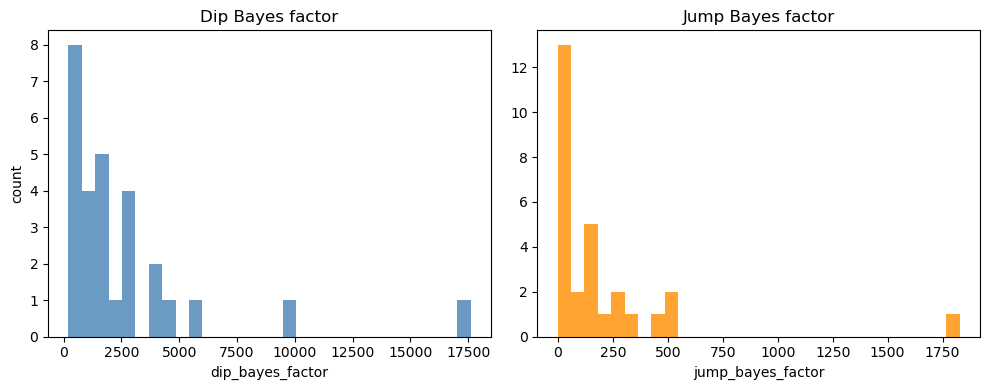

In [39]:
# Distribution of Bayes factors
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(df['dip_bayes_factor'], bins=30, color='steelblue', alpha=0.8)
ax[0].set_title('Dip Bayes factor')
ax[0].set_xlabel('dip_bayes_factor')
ax[0].set_ylabel('count')
ax[1].hist(df['jump_bayes_factor'], bins=30, color='darkorange', alpha=0.8)
ax[1].set_title('Jump Bayes factor')
ax[1].set_xlabel('jump_bayes_factor')
plt.tight_layout()
plt.show()


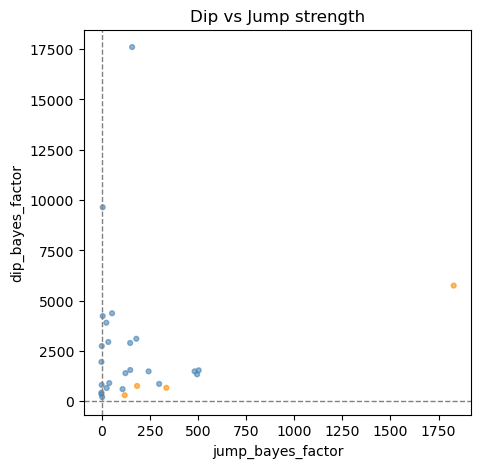

In [40]:
# Dip vs jump Bayes factor scatter
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df['jump_bayes_factor'], df['dip_bayes_factor'], s=12, alpha=0.6, 
           c=np.where(df['jump_significant'], 'darkorange', 'steelblue'))
ax.set_xlabel('jump_bayes_factor')
ax.set_ylabel('dip_bayes_factor')
ax.axhline(0, color='gray', lw=1, ls='--')
ax.axvline(0, color='gray', lw=1, ls='--')
ax.set_title('Dip vs Jump strength')
plt.show()


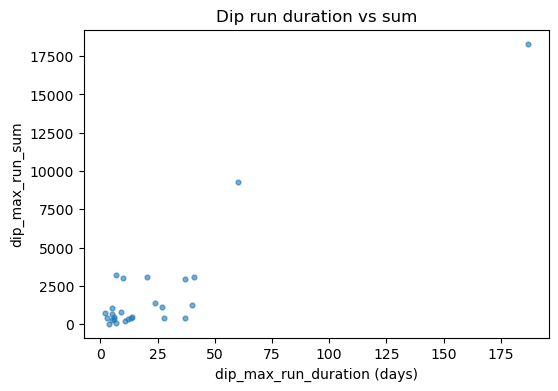

In [41]:
# Run-level strength: duration vs sum for dips
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df['dip_max_run_duration'], df['dip_max_run_sum'], s=12, alpha=0.6)
ax.set_xlabel('dip_max_run_duration (days)')
ax.set_ylabel('dip_max_run_sum')
ax.set_title('Dip run duration vs sum')
plt.show()


In [42]:
# Summary stats for key numeric columns
cols = ['dip_bayes_factor','jump_bayes_factor','dip_max_run_points','jump_max_run_points',
        'dip_max_run_duration','jump_max_run_duration','dip_max_run_sum','jump_max_run_sum']
df[cols].describe().T


,count,mean,std,min,25%,50%,75%,max
dip_bayes_factor,28.0,2655.522966,3578.512067,200.480933,731.688754,1479.828608,2980.229432,17605.462249
jump_bayes_factor,28.0,197.947105,356.038804,-1.549305,5.135322,113.931598,198.688424,1828.445921
dip_max_run_points,28.0,21.642857,29.402966,0.000000,7.750000,12.000000,23.250000,149.000000
jump_max_run_points,28.0,0.714286,2.105674,0.000000,0.000000,0.000000,0.000000,10.000000
dip_max_run_duration,26.0,23.853320,36.481940,2.018172,6.018789,11.497131,27.755970,186.746370
jump_max_run_duration,4.0,6.932242,5.386706,2.991670,3.706893,4.973929,8.199278,14.789441
dip_max_run_sum,26.0,2065.276666,3825.930189,35.581798,388.800711,704.573920,2544.688104,18311.573662
jump_max_run_sum,4.0,402.726177,654.039360,55.710810,59.623630,86.063349,429.165896,1383.067197


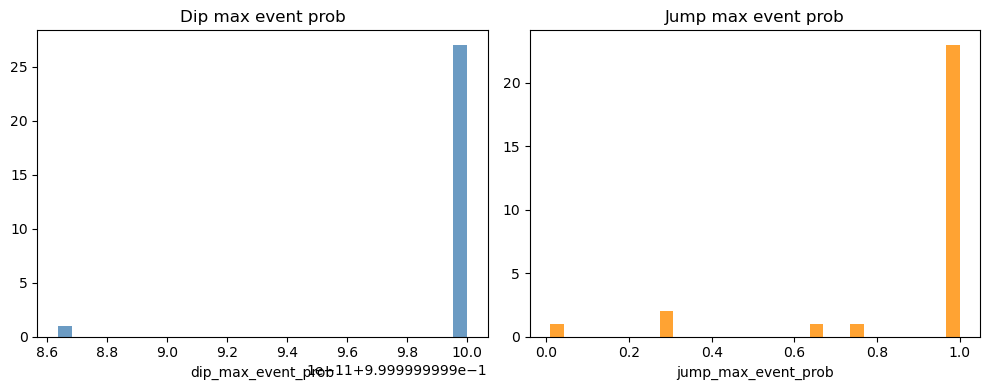

In [43]:
# Event probability distributions (if present)
if 'dip_max_event_prob' in df.columns or 'jump_max_event_prob' in df.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    if 'dip_max_event_prob' in df.columns:
        ax[0].hist(df['dip_max_event_prob'].dropna(), bins=30, color='steelblue', alpha=0.8)
        ax[0].set_title('Dip max event prob')
        ax[0].set_xlabel('dip_max_event_prob')
    if 'jump_max_event_prob' in df.columns:
        ax[1].hist(df['jump_max_event_prob'].dropna(), bins=30, color='darkorange', alpha=0.8)
        ax[1].set_title('Jump max event prob')
        ax[1].set_xlabel('jump_max_event_prob')
    plt.tight_layout()
    plt.show()
else:
    print('No event probability columns found')


## Simulation: false-positive check
Generate synthetic light curves (noise-only and with injected dips) and run the Bayesian scorer to estimate false-positive rates.

,dip_det,jump_det,dip_bf_med,jump_bf_med
scenario,,,,
bad_point_cluster,1.00,0.00,1055.391576,-0.711851
bright_nearby,0.16,0.10,176.714915,149.998124
camera_offset,0.78,1.00,434.137774,1972.327403
cepheid,1.00,1.00,3972.677455,3701.106705
contact_binary,0.78,1.00,426.941318,1289.871293
dip_deep,0.00,0.00,107.380068,-0.636891
dip_shallow,0.00,0.00,10.313584,-0.622351
drw,0.82,0.80,168.514326,208.254624
eclipse,0.56,0.00,3568.049681,-0.748704


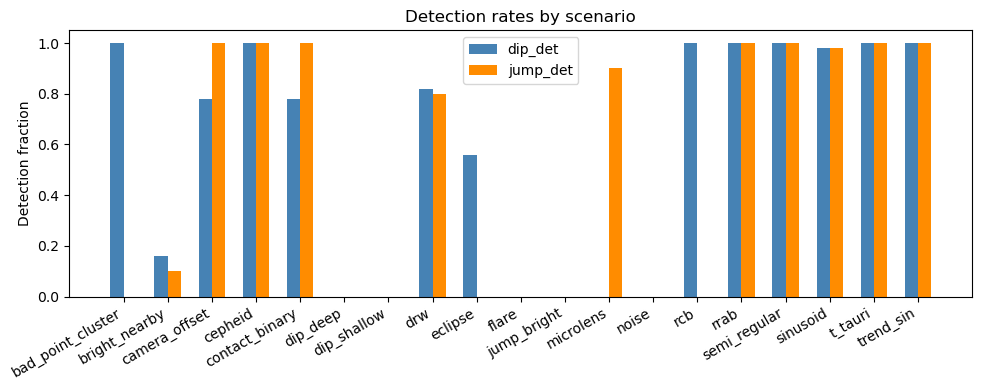

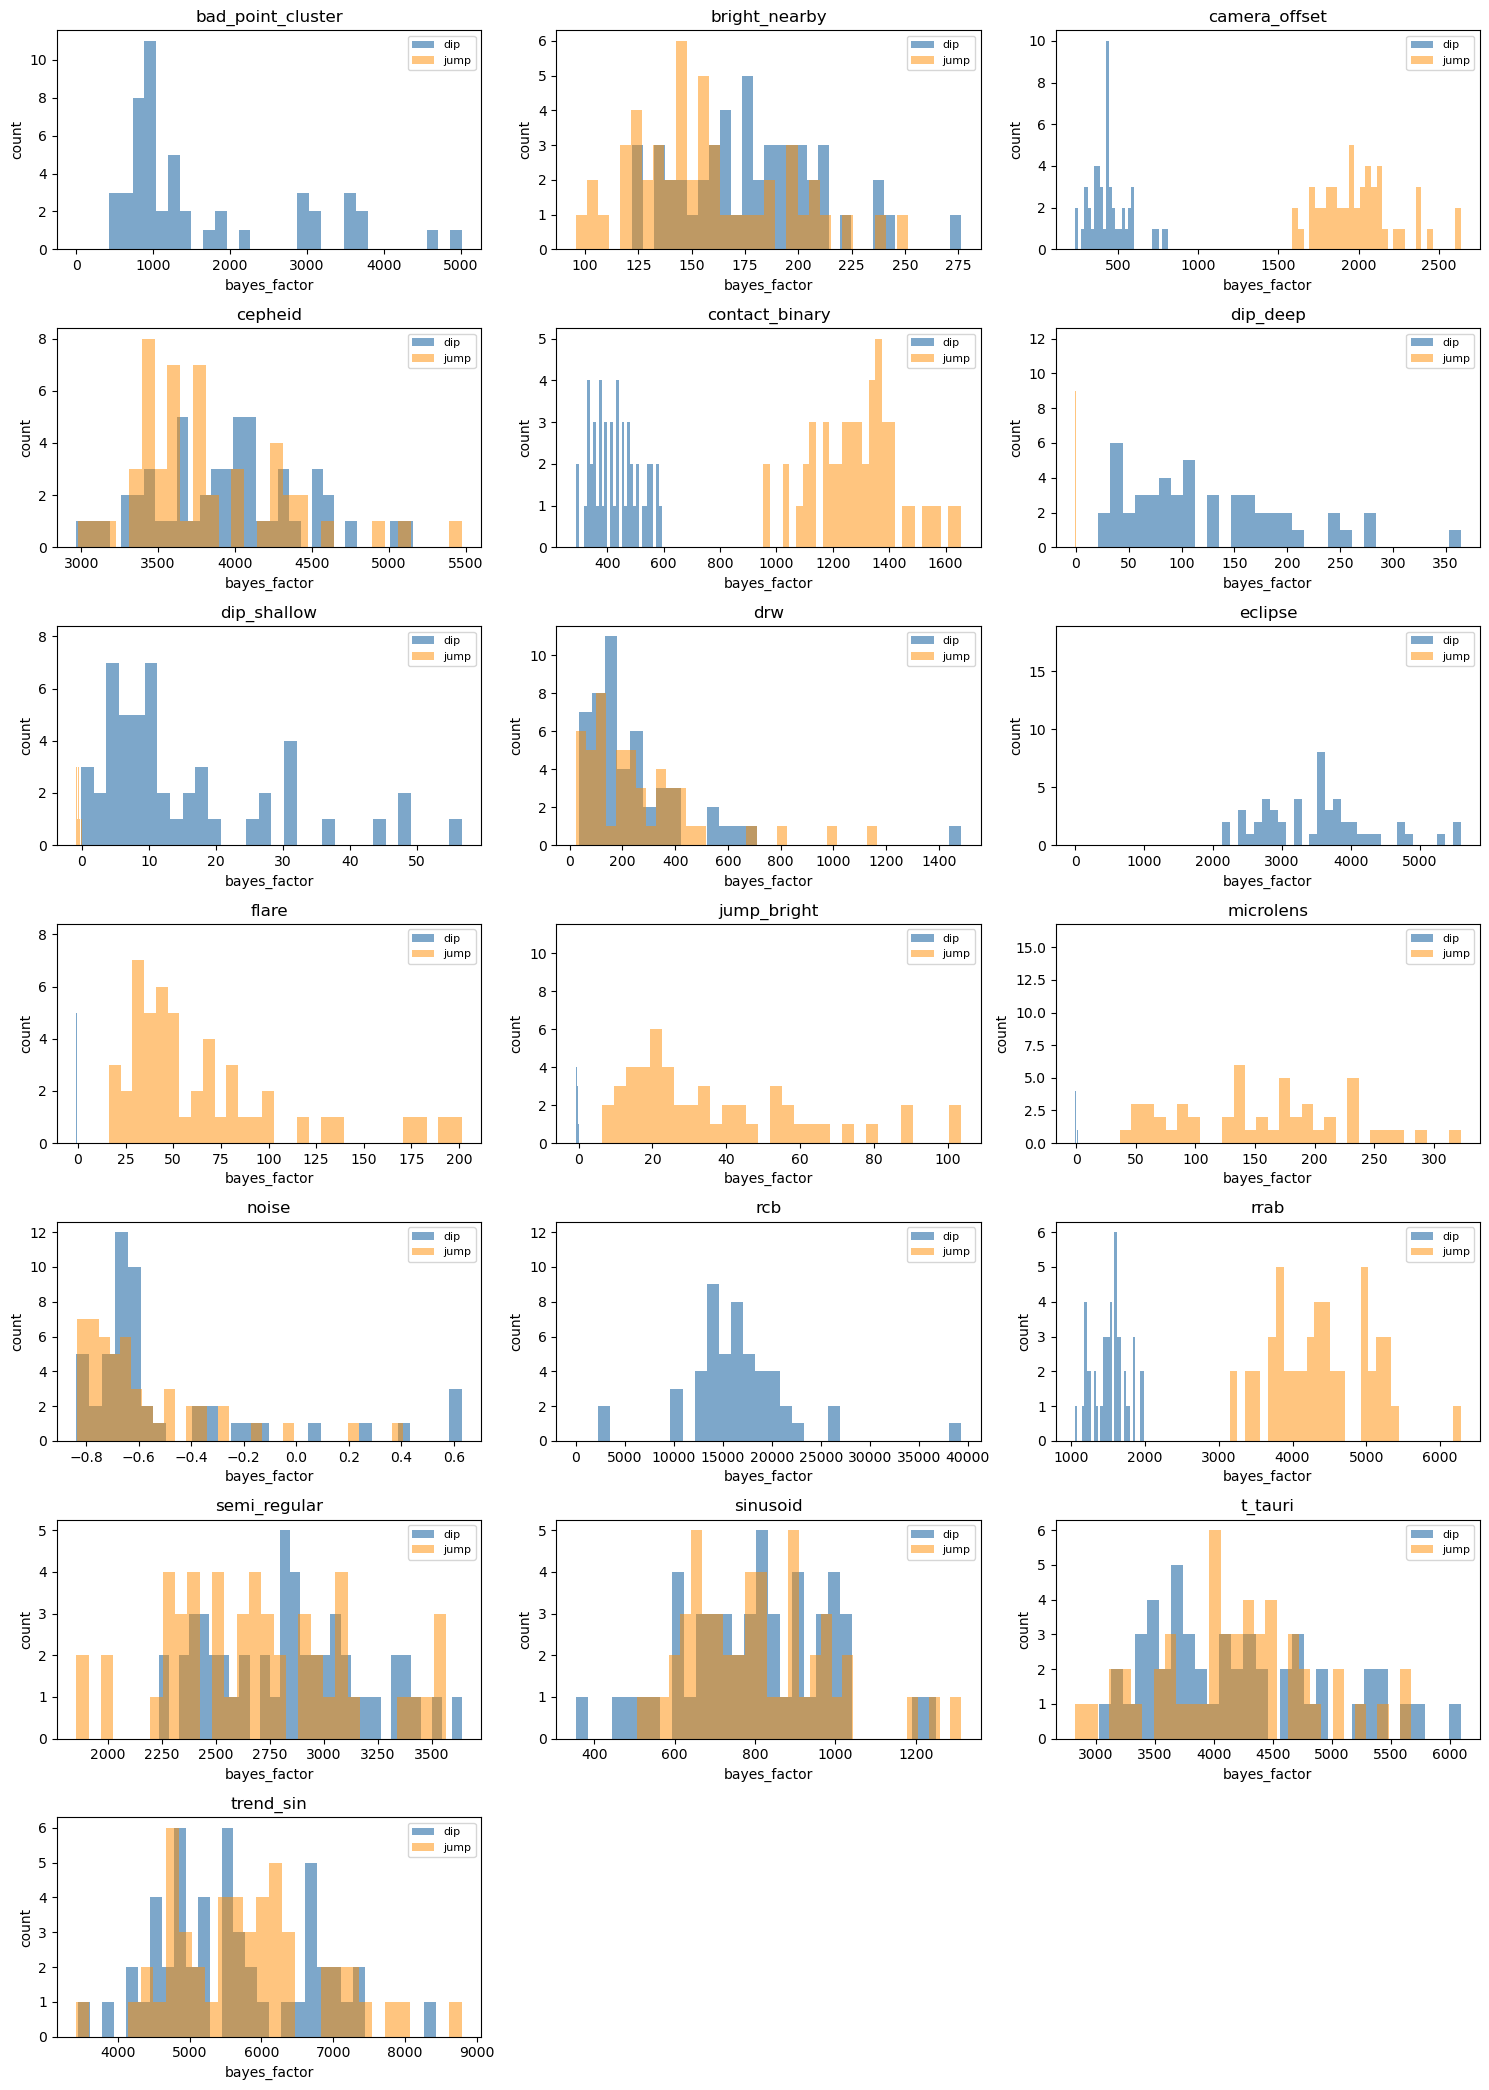

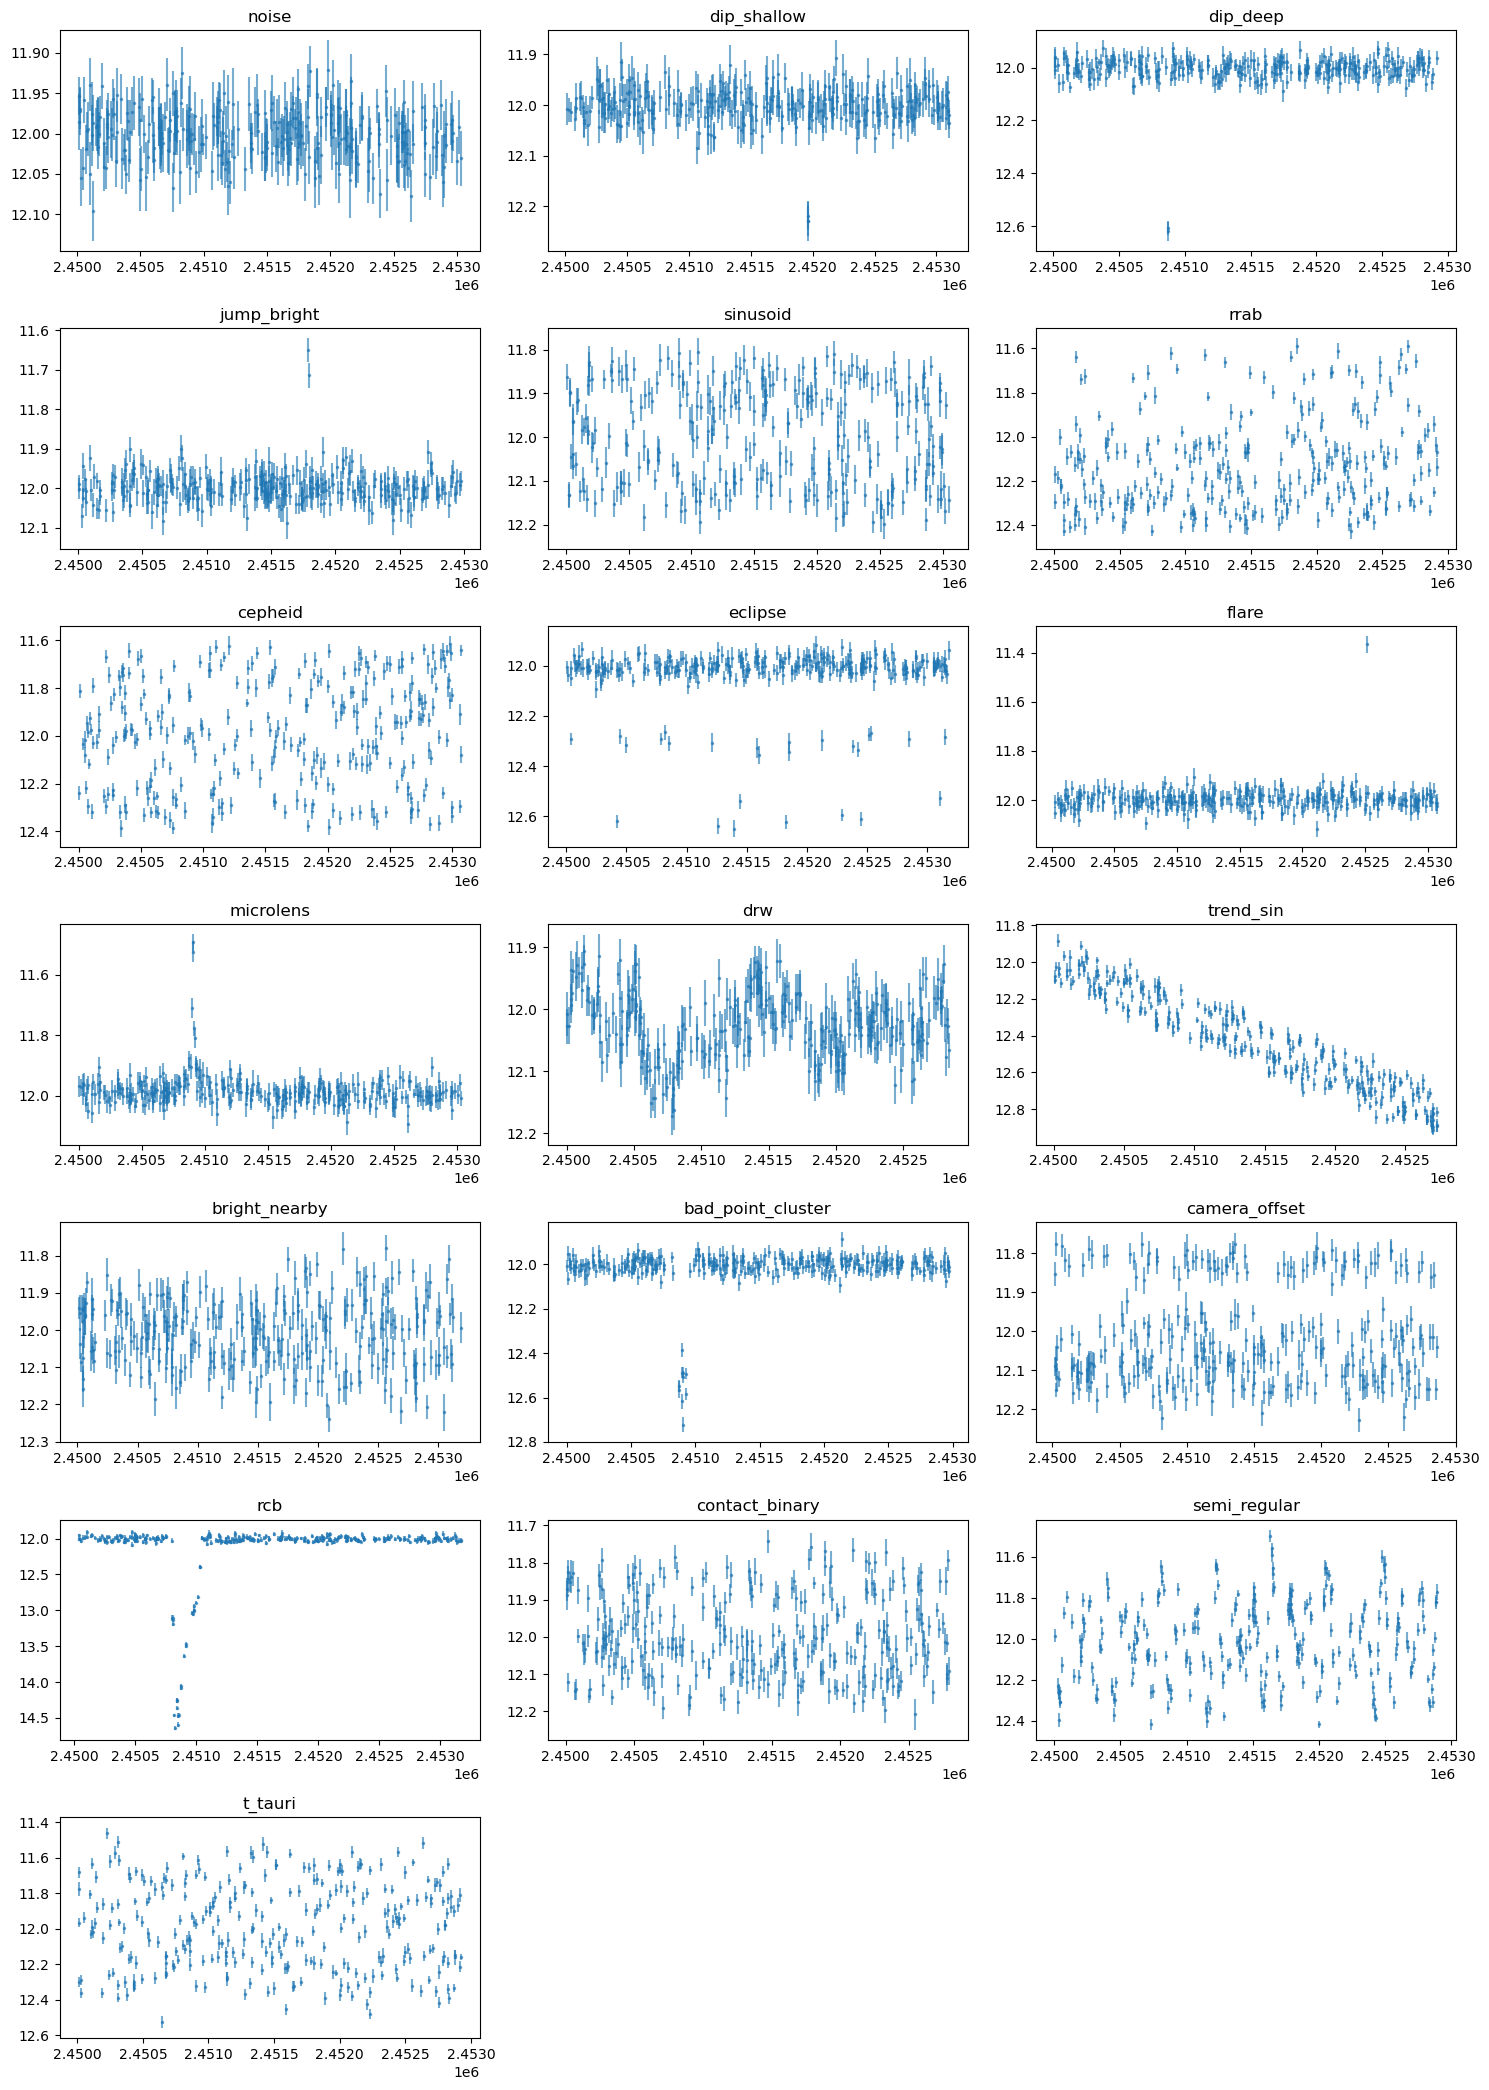

,dip_significant,jump_significant,dip_bayes_factor,jump_bayes_factor,dip_max_logbf,jump_max_logbf,scenario,truth_dip,truth_jump
0,False,False,-0.628933,-0.671890,3.795254,2.476854,noise,False,False
1,False,False,-0.689581,-0.292074,3.748149,2.957874,noise,False,False
2,False,False,-0.678987,-0.765395,3.072467,3.366245,noise,False,False
3,False,False,-0.570708,-0.612361,4.039375,3.485365,noise,False,False
4,False,False,-0.680146,-0.755064,3.491503,2.373494,noise,False,False
5,False,False,-0.793103,0.227176,2.576647,5.345162,noise,False,False
6,False,False,-0.642218,-0.352823,3.172960,4.740955,noise,False,False
7,False,False,-0.176505,-0.814053,5.656855,2.453820,noise,False,False
8,False,False,-0.808119,-0.594336,1.882425,3.153312,noise,False,False
9,False,False,0.066524,-0.729291,4.597353,2.705642,noise,False,False


In [44]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure imports work when running from notebooks/
candidates = [Path.cwd(), Path.cwd().parent, Path.cwd().parent.parent]
repo_root = next((p for p in candidates if (p / 'malca').exists()), Path.cwd())
for p in [repo_root, repo_root / 'malca']:
    sp = str(p.resolve())
    if sp not in sys.path:
        sys.path.insert(0, sp)

import events  # resolves to repo_root/malca/events.py

rng = np.random.default_rng(123)

def paczynski(t, t0, tE, amp):
    u = (t - t0) / max(tE, 1e-3)
    return -amp / np.sqrt(1.0 + u**2)

def drw_process(n, tau=50.0, sigma=0.05):
    dt = rng.exponential(1.0, size=n)
    x = np.zeros(n)
    for i in range(1, n):
        phi = np.exp(-dt[i]/tau)
        var = sigma**2 * (1-phi**2)
        x[i] = phi*x[i-1] + rng.normal(0, np.sqrt(var))
    return x

def simulate_lc(n_points=300, kind='noise', depth=0.4, width_days=5.0, amp=0.15, period=30.0, slope=0.0):
    jd = np.cumsum(rng.exponential(10.0, size=n_points)) + 2450000.0
    base_mag = 12.0
    err = rng.normal(0.03, 0.005, size=n_points).clip(0.01, 0.1)
    mag = rng.normal(base_mag, err)
    camera = np.zeros(n_points, dtype=int)

    if kind == 'dip':
        t0 = jd[rng.integers(10, n_points-10)]
        mask = np.abs(jd - t0) < width_days
        mag[mask] += depth
    elif kind == 'jump':
        t0 = jd[rng.integers(10, n_points-10)]
        mask = np.abs(jd - t0) < width_days
        mag[mask] -= depth
    elif kind == 'sin':
        phase = 2*np.pi*jd/period
        mag += amp*np.sin(phase)
    elif kind == 'rrab':
        phase = (jd/period) % 1
        template = np.where(phase < 0.2, -amp*(1-phase/0.2), amp*(phase-0.2)/0.8)
        mag += template
    elif kind == 'cepheid':
        phase = (jd/period) % 1
        mag += amp*np.sin(2*np.pi*phase) + 0.3*amp*np.sin(4*np.pi*phase)
    elif kind == 'eclipse':
        phase = (jd/period) % 1
        primary = np.abs(phase-0.0) < 0.05
        secondary = np.abs(phase-0.5) < 0.03
        mag[primary] += depth
        mag[secondary] += 0.5*depth
    elif kind == 'flare':
        t0 = jd[rng.integers(10, n_points-10)]
        mask = np.abs(jd - t0) < 1.0
        mag[mask] -= depth
    elif kind == 'microlens':
        t0 = jd[rng.integers(10, n_points-10)]
        mag += paczynski(jd, t0, width_days, depth)
    elif kind == 'drw':
        mag += drw_process(n_points, tau=50.0, sigma=0.08)
    elif kind == 'trend_sin':
        phase = 2*np.pi*jd/period
        mag += amp*np.sin(phase) + slope*(jd-jd[0])
    elif kind == 'bright_star':
        camera = rng.integers(0, 3, size=n_points)
        offsets = np.array([0.0, 0.08, -0.05])
        mag += offsets[camera]
        mag += rng.normal(0, 0.06, size=n_points)
        err = np.clip(err + rng.normal(0.01, 0.005, size=n_points), 0.005, 0.12)
    elif kind == 'bad_cluster':
        cluster_center = jd[rng.integers(n_points//4, 3*n_points//4)]
        cluster_mask = np.abs(jd - cluster_center) < 60
        mag[cluster_mask] += rng.normal(0.6, 0.1, size=cluster_mask.sum())
    elif kind == 'camera_offset':
        camera = rng.integers(0, 4, size=n_points)
        offsets = np.array([0.0, 0.15, -0.18, 0.08])
        mag += offsets[camera]
    elif kind == 'rcb':
        drop_starts = jd.min() + rng.uniform(150, 1700, size=2)
        for t0 in drop_starts:
            fade = (jd >= t0) & (jd <= t0 + 60)
            recovery = (jd > t0 + 60) & (jd <= t0 + 220)
            mag[fade] += 1.0 + 0.4 * rng.random(fade.sum())
            mag[recovery] += 1.0 * np.exp(-(jd[recovery] - (t0 + 60)) / 160)
    elif kind == 'contact_binary':
        p = period if period is not None else 0.5
        phase = (jd / p) % 1
        mag += amp * (0.7*np.sin(2*np.pi*phase) + 0.3*np.sin(4*np.pi*phase + 0.5))
    elif kind == 'semi_regular':
        p = period if period is not None else 120.0
        phase = 2*np.pi*jd/p
        envelope = 1.0 + 0.5*np.sin(2*np.pi*jd/(p*3))
        mag += amp * envelope * np.sin(phase) + rng.normal(0, 0.05, size=n_points)
    elif kind == 't_tauri':
        p = period if period is not None else 8.1
        phase = 2*np.pi*jd/p + rng.normal(0, 0.3, size=n_points)
        mag += amp * np.sin(phase) + rng.normal(0, 0.1, size=n_points)
    df = pd.DataFrame({'JD': jd, 'mag': mag, 'error': err})
    df['camera#'] = camera  # ensure per-camera baseline grouping works
    return df

def score_df(df):
    res = events.run_bayesian_significance(
        df,
        baseline_func=None,
        use_sigma_eff=False,
        require_sigma_eff=False,
        compute_event_prob=False,
        trigger_mode='logbf',
        logbf_threshold_dip=5.0,
        logbf_threshold_jump=5.0,
    )
    return {
        'dip_significant': res['dip']['significant'],
        'jump_significant': res['jump']['significant'],
        'dip_bayes_factor': res['dip']['bayes_factor'],
        'jump_bayes_factor': res['jump']['bayes_factor'],
        'dip_max_logbf': res['dip'].get('max_log_bf_local', np.nan),
        'jump_max_logbf': res['jump'].get('max_log_bf_local', np.nan),
    }

def assess(trials=50, scenario=None):
    rows = []
    sim_kwargs = {k: v for k, v in scenario.items() if k != 'name'}
    for _ in range(trials):
        df_sim = simulate_lc(**sim_kwargs)
        row = score_df(df_sim)
        row['scenario'] = scenario['name']
        row['truth_dip'] = scenario['kind'] == 'dip'
        row['truth_jump'] = scenario['kind'] == 'jump'
        rows.append(row)
    return pd.DataFrame(rows)

scenarios = [
    {'name': 'noise', 'kind': 'noise'},
    {'name': 'dip_shallow', 'kind': 'dip', 'depth': 0.2, 'width_days': 3.0},
    {'name': 'dip_deep', 'kind': 'dip', 'depth': 0.6, 'width_days': 5.0},
    {'name': 'jump_bright', 'kind': 'jump', 'depth': 0.3, 'width_days': 3.0},
    {'name': 'sinusoid', 'kind': 'sin', 'amp': 0.15, 'period': 30.0},
    {'name': 'rrab', 'kind': 'rrab', 'amp': 0.4, 'period': 0.8},
    {'name': 'cepheid', 'kind': 'cepheid', 'amp': 0.3, 'period': 5.0},
    {'name': 'eclipse', 'kind': 'eclipse', 'depth': 0.6, 'period': 3.0},
    {'name': 'flare', 'kind': 'flare', 'depth': 0.6, 'width_days': 0.5},
    {'name': 'microlens', 'kind': 'microlens', 'depth': 0.5, 'width_days': 5.0},
    {'name': 'drw', 'kind': 'drw'},
    {'name': 'trend_sin', 'kind': 'trend_sin', 'amp': 0.1, 'period': 40.0, 'slope': 0.0003},
    {'name': 'bright_nearby', 'kind': 'bright_star'},
    {'name': 'bad_point_cluster', 'kind': 'bad_cluster'},
    {'name': 'camera_offset', 'kind': 'camera_offset'},
    {'name': 'rcb', 'kind': 'rcb'},
    {'name': 'contact_binary', 'kind': 'contact_binary', 'period': 0.5, 'amp': 0.2},
    {'name': 'semi_regular', 'kind': 'semi_regular', 'period': 140.0, 'amp': 0.25},
    {'name': 't_tauri', 'kind': 't_tauri', 'period': 8.1, 'amp': 0.3},
]

results = []
for sc in scenarios:
    res = assess(trials=50, scenario=sc)
    results.append(res)
all_res = pd.concat(results, ignore_index=True)

# Detection rates by scenario
det_rates = all_res.groupby('scenario').agg(
    dip_det=('dip_significant','mean'),
    jump_det=('jump_significant','mean'),
    dip_bf_med=('dip_bayes_factor','median'),
    jump_bf_med=('jump_bayes_factor','median'),
)
display(det_rates)

# Bar plot of detection rates
fig, ax = plt.subplots(figsize=(10,4))
x = np.arange(len(det_rates))
ax.bar(x - 0.15, det_rates['dip_det'], width=0.3, label='dip_det', color='steelblue')
ax.bar(x + 0.15, det_rates['jump_det'], width=0.3, label='jump_det', color='darkorange')
ax.set_xticks(x)
ax.set_xticklabels(det_rates.index, rotation=30, ha='right')
ax.set_ylim(0,1.05)
ax.set_ylabel('Detection fraction')
ax.legend()
ax.set_title('Detection rates by scenario')
plt.tight_layout()
plt.show()

# Bayes factor distributions per scenario
ncols = 3
nrows = int(np.ceil(len(det_rates) / ncols))
fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols, 3*nrows))
ax = np.array(ax).ravel()
last = -1
for i, (sc, sub) in enumerate(all_res.groupby('scenario')):
    ax[i].hist(sub['dip_bayes_factor'], bins=30, alpha=0.7, color='steelblue', label='dip')
    ax[i].hist(sub['jump_bayes_factor'], bins=30, alpha=0.5, color='darkorange', label='jump')
    ax[i].set_title(sc)
    ax[i].set_xlabel('bayes_factor')
    ax[i].set_ylabel('count')
    ax[i].legend(fontsize=8)
    last = i
for j in range(last + 1, len(ax)):
    ax[j].axis('off')
plt.tight_layout()
plt.show()

# Plot one example from each scenario
nrows = int(np.ceil(len(scenarios) / ncols))
fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols, 3*nrows))
ax = np.array(ax).ravel()
last = -1
for i, sc in enumerate(scenarios):
    df_ex = simulate_lc(**{k:v for k,v in sc.items() if k!='name'})
    ax[i].errorbar(df_ex['JD'], df_ex['mag'], yerr=df_ex['error'], fmt='.', ms=3, alpha=0.6)
    ax[i].invert_yaxis()
    ax[i].set_title(sc['name'])
    last = i
for j in range(last + 1, len(ax)):
    ax[j].axis('off')
plt.tight_layout()
plt.show()

# Full results table
all_res


In [45]:
# False positives: counts and rates by scenario and overall

def false_positive_stats(df):
    def agg(group):
        dip_neg = (~group["truth_dip"]).sum()
        jump_neg = (~group["truth_jump"]).sum()
        dip_fp = ((~group["truth_dip"]) & group["dip_significant"]).sum()
        jump_fp = ((~group["truth_jump"]) & group["jump_significant"]).sum()
        return pd.Series({
            "rows": len(group),
            "dip_fp": dip_fp,
            "dip_fp_rate": dip_fp / dip_neg if dip_neg else float('nan'),
            "jump_fp": jump_fp,
            "jump_fp_rate": jump_fp / jump_neg if jump_neg else float('nan'),
        })
    by_scenario = df.groupby("scenario").apply(agg)
    overall = agg(df).rename("overall")
    return by_scenario, overall

fp_by_scenario, fp_overall = false_positive_stats(all_res)
display(fp_by_scenario)
print("\nOverall false positives:")
display(fp_overall.to_frame().T)


/tmp/ipykernel_353692/3917295832.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_scenario = df.groupby("scenario").apply(agg)


,rows,dip_fp,dip_fp_rate,jump_fp,jump_fp_rate
scenario,,,,,
bad_point_cluster,50.0,50.0,1.00,0.0,0.00
bright_nearby,50.0,8.0,0.16,5.0,0.10
camera_offset,50.0,39.0,0.78,50.0,1.00
cepheid,50.0,50.0,1.00,50.0,1.00
contact_binary,50.0,39.0,0.78,50.0,1.00
dip_deep,50.0,0.0,NaN,0.0,0.00
dip_shallow,50.0,0.0,NaN,0.0,0.00
drw,50.0,41.0,0.82,40.0,0.80
eclipse,50.0,28.0,0.56,0.0,0.00



Overall false positives:


,rows,dip_fp,dip_fp_rate,jump_fp,jump_fp_rate
overall,950.0,554.0,0.651765,489.0,0.543333


## False positives on real Skypatrol light curves
Assess how often the pipeline flags dips/jumps on the real Skypatrol dataset using precomputed results.


In [46]:
from pathlib import Path


def find_real_results():
    candidates = [
        Path('output/results_bayes.csv'),
        Path('output/skypatrol_events.csv'),
    ]
    if 'repo_root' in globals():
        candidates = [repo_root / p for p in candidates] + candidates
    for c in candidates:
        if c.exists():
            return c
    return None

REAL_RESULTS_PATH = find_real_results()
if REAL_RESULTS_PATH is None:
    raise FileNotFoundError("Could not find output/results_bayes.csv or output/skypatrol_events.csv; set REAL_RESULTS_PATH manually.")

df_real = pd.read_csv(REAL_RESULTS_PATH)
df_real['dip_or_jump'] = df_real['dip_significant'] | df_real['jump_significant']

def safe_mean(col):
    return float(df_real[col].mean()) if col in df_real else float('nan')

dip_rate = safe_mean('dip_significant')
jump_rate = safe_mean('jump_significant')
overall_rate = float(df_real['dip_or_jump'].mean())

print(f'Loaded {len(df_real)} real light curves from {REAL_RESULTS_PATH}')
print(f'Dip positives: {dip_rate:.3f}  Jump positives: {jump_rate:.3f}  Any-event: {overall_rate:.3f}')

metrics = {}
for col, key in [
    ('dip_bayes_factor', 'dip_bf_med'),
    ('jump_bayes_factor', 'jump_bf_med'),
    ('dip_max_log_bf_local', 'dip_logbf_med'),
    ('jump_max_log_bf_local', 'jump_logbf_med'),
]:
    if col in df_real:
        metrics[key] = df_real[col].median()

summary = pd.DataFrame([metrics])
display(summary)

cols_to_show = [c for c in [
    'path',
    'dip_significant', 'jump_significant',
    'dip_bayes_factor', 'jump_bayes_factor',
    'dip_max_log_bf_local', 'jump_max_log_bf_local',
    'baseline_source'
] if c in df_real]
sort_keys = [c for c in ['dip_bayes_factor','jump_bayes_factor'] if c in df_real]
top = df_real.sort_values(by=sort_keys, ascending=False) if sort_keys else df_real
display(top.head(5)[cols_to_show])


Loaded 26 real light curves from /home/calder/code/malca/output/results_bayes.csv
Dip positives: 0.923  Jump positives: 0.115  Any-event: 0.923


,dip_bf_med,jump_bf_med,dip_logbf_med,jump_logbf_med
0,1479.828608,113.931598,166.244503,24.487059


,path,dip_significant,jump_significant,dip_bayes_factor,jump_bayes_factor,dip_max_log_bf_local,jump_max_log_bf_local
17,data/skypatrol2/532576686103-light-curves.csv,True,False,17605.462249,158.094226,327.723686,12.110152
22,data/skypatrol2/644245387906-light-curves.csv,True,False,9640.236871,5.151646,319.210236,8.772316
12,data/skypatrol2/360777377116-light-curves.csv,True,False,4368.705154,53.884605,542.716181,26.931763
21,data/skypatrol2/515397118400-light-curves.csv,True,False,4229.463964,5.086347,271.104184,7.522166
25,data/skypatrol2/601296043597-light-curves.csv,True,False,3898.273183,23.984377,72.505079,6.713017


## Baseline inspection
Overlay each simulated light curve with the pipeline baseline (per_camera_gp_baseline) to spot baseline misfits.

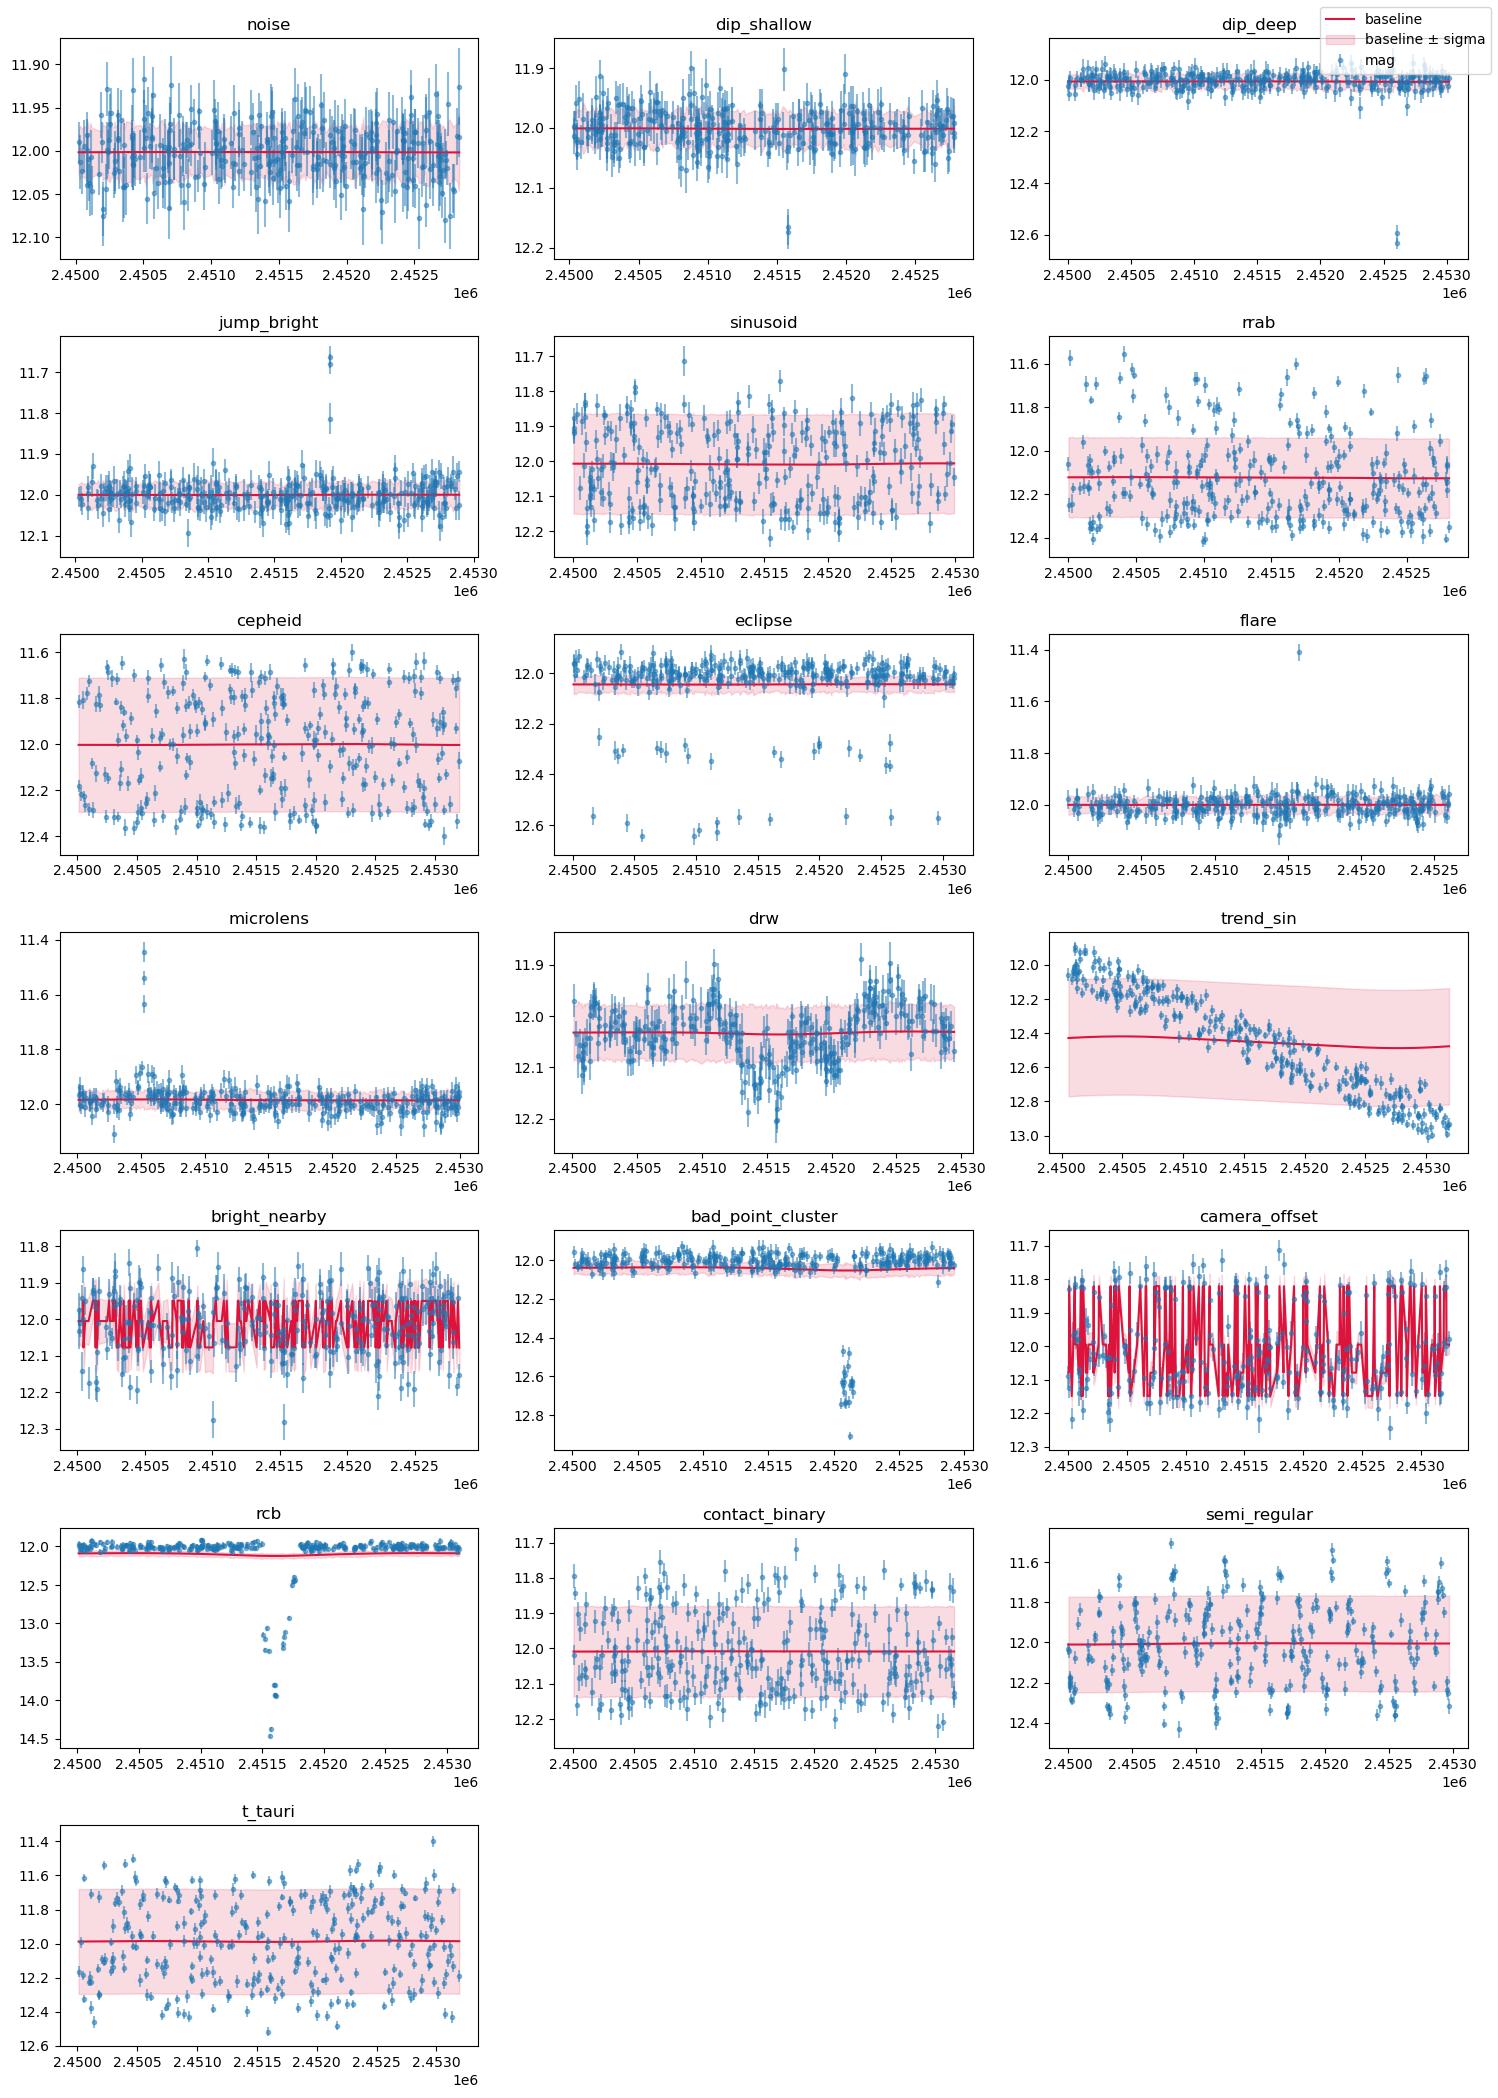

In [47]:
# Plot simulated light curves with GP baseline overlay (baseline ± sigma_eff)
import matplotlib.pyplot as plt
from baseline import per_camera_gp_baseline
import events


def plot_baseline_grid(scenarios, ncols=3):
    n = len(scenarios)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3*nrows), sharex=False, sharey=False)
    axes = np.array(axes).ravel()
    for i, sc in enumerate(scenarios):
        df = simulate_lc(**{k: v for k, v in sc.items() if k != 'name'})
        try:
            df_base = per_camera_gp_baseline(df, **events.DEFAULT_BASELINE_KWARGS)
        except Exception as e:
            print(f"baseline failed for {sc['name']}: {e}")
            df_base = df.copy()
            df_base['baseline'] = np.nanmedian(df['mag'])
            df_base['sigma_eff'] = np.nanmedian(df['error'])
        ax = axes[i]
        ax.errorbar(df['JD'], df['mag'], yerr=df['error'], fmt='.', alpha=0.5, label='mag')
        if 'baseline' in df_base.columns:
            ax.plot(df_base['JD'], df_base['baseline'], color='crimson', lw=1.5, label='baseline')
        if 'sigma_eff' in df_base.columns:
            ax.fill_between(df_base['JD'], df_base['baseline'] + df_base['sigma_eff'],
                            df_base['baseline'] - df_base['sigma_eff'], color='crimson', alpha=0.15,
                            label='baseline ± sigma')
        ax.invert_yaxis()
        ax.set_title(sc['name'])
    # hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    plt.tight_layout()
    plt.show()

plot_baseline_grid(scenarios)
